In [1]:
import numpy as np

import networkx as nx

from qiskit import *
from qiskit_aer import Aer

# importing Qiskit
from qiskit import QuantumCircuit, transpile

# import basic plot tools
from qiskit.visualization import plot_histogram

import mapomatic as mm

from compatibilityGraph import CompatibilityGraph

In [2]:
from qiskit_ibm_runtime.fake_provider import FakeGuadalupeV2

backend = FakeGuadalupeV2()

coupling_map = backend.coupling_map

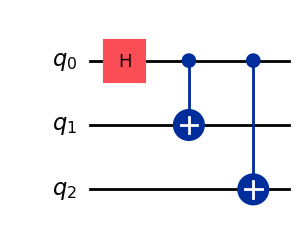

In [3]:
circuit1 = QuantumCircuit(3)
# Add a H gate on qubit $q_{0}$, putting this qubit in superposition.
circuit1.h(0)
# Add a CX (CNOT) gate on control qubit $q_{0}$ and target qubit $q_{1}$, putting
# the qubits in a Bell state.
circuit1.cx(0, 1)
# Add a CX (CNOT) gate on control qubit $q_{0}$ and target qubit $q_{2}$, putting
# the qubits in a GHZ state.
circuit1.cx(0, 2)
circuit1.draw('mpl')

In [4]:
area1 = circuit1.num_qubits * circuit1.depth()

In [5]:
trans_qc = transpile(circuit1, backend, optimization_level=3)
trans_qc.draw('mpl')
small_qc = mm.deflate_circuit(trans_qc)
layouts1 = mm.matching_layouts(small_qc, backend)
scores1 = mm.evaluate_layouts(small_qc, layouts1, backend)

In [6]:
module1 = ([], area1)

for layout in scores1:
    module1[0].append(layout)

print(module1)

([([6, 7, 10], 0.013929042526648838), ([10, 7, 6], 0.01392904252664895), ([13, 12, 15], 0.015165870500816858), ([15, 12, 13], 0.015165870500816858), ([4, 1, 0], 0.01735263678541432), ([0, 1, 4], 0.017352636785414433), ([11, 8, 5], 0.01837732002538084), ([5, 8, 11], 0.01837732002538095), ([10, 7, 4], 0.01885975449774413), ([4, 7, 10], 0.01885975449774424), ([4, 7, 6], 0.0190416583902997), ([6, 7, 4], 0.0190416583902997), ([7, 4, 1], 0.019388409806854412), ([1, 4, 7], 0.019388409806854523), ([12, 13, 14], 0.019446618476815614), ([14, 13, 12], 0.019446618476815614), ([8, 11, 14], 0.019949642851425087), ([14, 11, 8], 0.019949642851425087), ([9, 8, 5], 0.021866859108901293), ([5, 8, 9], 0.021866859108901404), ([3, 5, 8], 0.02194850595563569), ([8, 5, 3], 0.02194850595563569), ([11, 8, 9], 0.02219035423557658), ([9, 8, 11], 0.02219035423557658), ([4, 1, 2], 0.02277794163847302), ([2, 1, 4], 0.02277794163847313), ([11, 14, 13], 0.022913833995390265), ([13, 14, 11], 0.022913833995390265), ([2,

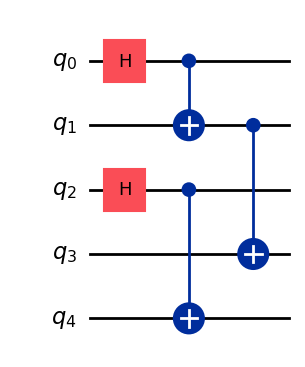

In [7]:
circuit2 = QuantumCircuit(5)
# Add a H gate on qubit $q_{0}$, putting this qubit in superposition.
circuit2.h(0)
circuit2.h(2)
# Add a CX (CNOT) gate on control qubit $q_{0}$ and target qubit $q_{1}$, putting
# the qubits in a Bell state.
circuit2.cx(0, 1)
# Add a CX (CNOT) gate on control qubit $q_{0}$ and target qubit $q_{2}$, putting
# the qubits in a GHZ state.
circuit2.cx(1, 3)

circuit2.cx(2,4)
circuit2.draw('mpl')

In [8]:
area2 = circuit2.num_qubits * circuit2.depth()
print(area2)

15


In [9]:
trans_qc = transpile(circuit2, backend, optimization_level=3)
trans_qc.draw('mpl')
small_qc = mm.deflate_circuit(trans_qc)
layouts2 = mm.matching_layouts(small_qc, backend)
scores2 = mm.evaluate_layouts(small_qc, layouts2, backend)

In [10]:
module2 = ([], area2)

for layout in scores2:
    module2[0].append(layout)

print(module2)

([([6, 7, 10, 13, 12], 0.021196082830625018), ([6, 7, 10, 12, 13], 0.021221396856855756), ([10, 7, 6, 13, 12], 0.021311621690194626), ([10, 7, 6, 12, 13], 0.02133693272833581), ([6, 7, 10, 1, 4], 0.021341169473535038), ([10, 7, 6, 1, 4], 0.02145669120695204), ([6, 7, 10, 4, 1], 0.021508849647415618), ([10, 7, 6, 4, 1], 0.021624351587719914), ([6, 7, 10, 15, 12], 0.021789899054285966), ([6, 7, 10, 12, 15], 0.021819120492246324), ([10, 7, 6, 15, 12], 0.021905367819275767), ([10, 7, 6, 12, 15], 0.021934585807912188), ([13, 12, 15, 10, 7], 0.02211658093440938), ([15, 12, 13, 10, 7], 0.02212050249491193), ([13, 12, 15, 7, 10], 0.022182487838114162), ([15, 12, 13, 7, 10], 0.022186409134313467), ([13, 12, 15, 7, 6], 0.022248361046505294), ([15, 12, 13, 7, 6], 0.022252282078536134), ([13, 12, 15, 6, 7], 0.022297881009713527), ([15, 12, 13, 6, 7], 0.022301801843156777), ([13, 12, 15, 1, 4], 0.02264348140918826), ([15, 12, 13, 1, 4], 0.02264740085668626), ([13, 12, 15, 4, 1], 0.02281093844924009

In [11]:
modules = [module1, module2]

In [12]:
graphGen = CompatibilityGraph(buffer_distance=2, coupling_map= coupling_map, modules=modules)
compGraph = graphGen.generateCompatibilityGraph()

952
(0, 0)
(0, 1)
(0, 2)
(0, 3)
(0, 4)
(0, 5)
(0, 6)
(0, 7)
(0, 8)
(0, 9)
(0, 10)
(0, 11)
(0, 12)
(0, 13)
(0, 14)
(0, 15)
(0, 16)
(0, 17)
(0, 18)
(0, 19)
(0, 20)
(0, 21)
(0, 22)
(0, 23)
(0, 24)
(0, 25)
(0, 26)
(0, 27)
(0, 28)
(0, 29)
(0, 30)
(0, 31)
(0, 32)
(0, 33)
(0, 34)
(0, 35)
(0, 36)
(0, 37)
(0, 38)
(0, 39)
(1, 0)
(1, 1)
(1, 2)
(1, 3)
(1, 4)
(1, 5)
(1, 6)
(1, 7)
(1, 8)
(1, 9)
(1, 10)
(1, 11)
(1, 12)
(1, 13)
(1, 14)
(1, 15)
(1, 16)
(1, 17)
(1, 18)
(1, 19)
(1, 20)
(1, 21)
(1, 22)
(1, 23)
(1, 24)
(1, 25)
(1, 26)
(1, 27)
(1, 28)
(1, 29)
(1, 30)
(1, 31)
(1, 32)
(1, 33)
(1, 34)
(1, 35)
(1, 36)
(1, 37)
(1, 38)
(1, 39)
(1, 40)
(1, 41)
(1, 42)
(1, 43)
(1, 44)
(1, 45)
(1, 46)
(1, 47)
(1, 48)
(1, 49)
(1, 50)
(1, 51)
(1, 52)
(1, 53)
(1, 54)
(1, 55)
(1, 56)
(1, 57)
(1, 58)
(1, 59)
(1, 60)
(1, 61)
(1, 62)
(1, 63)
(1, 64)
(1, 65)
(1, 66)
(1, 67)
(1, 68)
(1, 69)
(1, 70)
(1, 71)
(1, 72)
(1, 73)
(1, 74)
(1, 75)
(1, 76)
(1, 77)
(1, 78)
(1, 79)
(1, 80)
(1, 81)
(1, 82)
(1, 83)
(1, 84)
(1, 85)
(1, 86)


In [18]:
print(compGraph.number_of_nodes())
print(compGraph.number_of_edges())

952
16


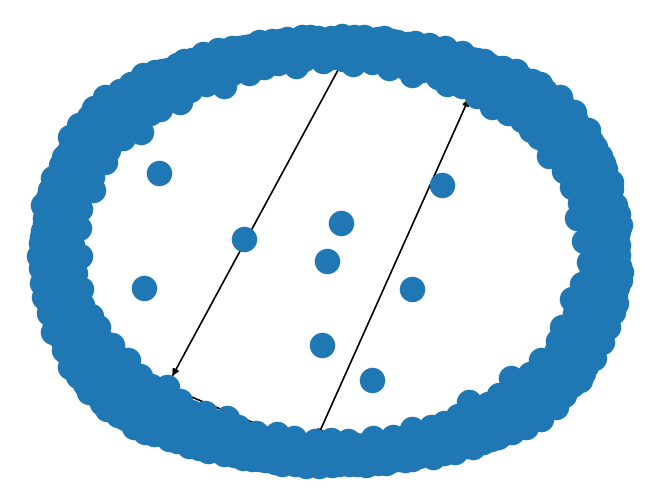

In [17]:
nx.draw(compGraph)